### Project - MovieLens Data Analysis

The GroupLens Research Project is a research group in the Department of Computer Science and Engineering at the University of Minnesota. The data is widely used for collaborative filtering and other filtering solutions. However, we will be using this data to act as a means to demonstrate our skill in using Python to “play” with data.

#### Domain 
Internet and Entertainment

**Note that the project will need you to apply the concepts of groupby and merging extensively.**

#### 1. Import the necessary packages - 2.5 marks

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

font = {'weight' : 'normal',
        'size'   : 10}

plt.rc('font', **font)

#### 2. Read the 3 datasets into dataframes - 2.5 marks

In [35]:
UsersRating = pd.read_csv('Data.csv').sort_values(by='movie id')
Movies = pd.read_csv('item.csv').sort_values(by='movie id')
Users = pd.read_csv('user.csv').sort_values(by='user id')

#### 3. Apply info, shape, describe, and find the number of missing values in the data - 5 marks

In [36]:
print("Movies shape: ")
print(Movies.shape)
print("\nUsers shape: ")
print(Users.shape)
print("\nData shape: ")
print(UsersRating.shape)

print("\n\nMovie info")
print(Movies.info())
print("\n\nUser info")
print(Users.info())
print("\n\nData info")
print(UsersRating.info())

print("\n\nMovie describe")
print(Movies.describe())
print("\n\nUser describe")
print(Users.describe())
print("\n\nData describe")
print(UsersRating.describe())

Movies shape: 
(1681, 22)

Users shape: 
(943, 5)

Data shape: 
(100000, 4)


Movie info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1681 entries, 0 to 1680
Data columns (total 22 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   movie id      1681 non-null   int64 
 1   movie title   1681 non-null   object
 2   release date  1681 non-null   object
 3   unknown       1681 non-null   int64 
 4   Action        1681 non-null   int64 
 5   Adventure     1681 non-null   int64 
 6   Animation     1681 non-null   int64 
 7   Childrens     1681 non-null   int64 
 8   Comedy        1681 non-null   int64 
 9   Crime         1681 non-null   int64 
 10  Documentary   1681 non-null   int64 
 11  Drama         1681 non-null   int64 
 12  Fantasy       1681 non-null   int64 
 13  Film-Noir     1681 non-null   int64 
 14  Horror        1681 non-null   int64 
 15  Musical       1681 non-null   int64 
 16  Mystery       1681 non-null   int64 
 17  R

#### 4. Find the number of movies per genre using the item data - 5 marks

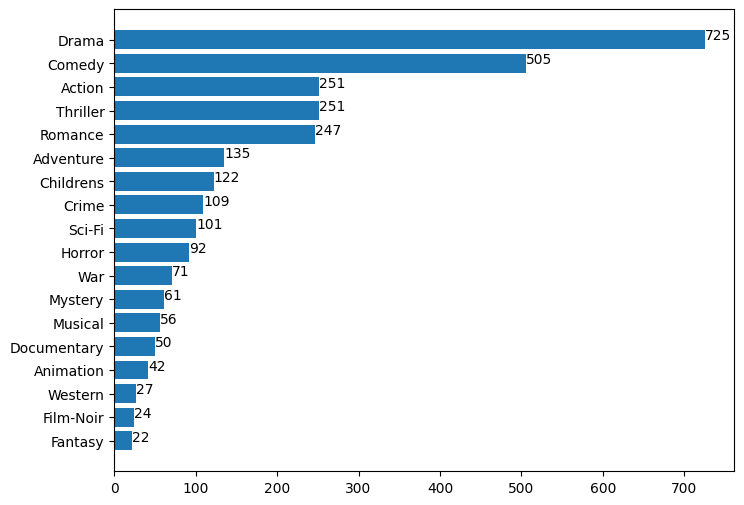

In [37]:
MoviesGenre = Movies.drop(['movie id', 'movie title', 'release date', 'unknown'], axis = 1).sum().sort_values()
mx = MoviesGenre.index
my = MoviesGenre.values

plt.rcParams["figure.figsize"] = (8,6)
plt.barh(mx, my)

for index, value in enumerate(my):
    plt.text(value, index, str(value))

#### 5. Find the movies that have more than one genre - 2.5 marks

In [38]:
Movies["genre count"] = Movies.loc[:,'unknown':'Western'].sum(axis=1)
print("Movies with more than 1 genre: " + str(len(Movies.loc[Movies['genre count'] > 1])))

Movies with more than 1 genre: 849


#### 6. Drop the movie where the genre is unknown - 2.5 marks

In [39]:
print(Movies.loc[Movies['unknown'] == 1])
Movies = Movies.drop(Movies.loc[Movies['unknown'] == 1].index)

      movie id    movie title release date  unknown  Action  Adventure  \
1371      1373  Good Morning    4-Feb-1971        1       0          0   

      Animation  Childrens  Comedy  Crime  ...  Film-Noir  Horror  Musical  \
1371          0          0       0      0  ...          0       0        0   

      Mystery  Romance  Sci-Fi  Thriller  War  Western  genre count  
1371        0        0       0         0    0        0            1  

[1 rows x 23 columns]


### 7. Univariate plots of columns: 'rating', 'Age', 'release year', 'Gender' and 'Occupation' - 10 marks

In [40]:
# HINT: use distplot for age and countplot for gender,ratings,occupation.
# HINT: Please refer to the below snippet to understand how to get to release year from release date. You can use str.split()
# as depicted below
# Hint : Use displot without kde for release year or line plot showing year wise count.

In [41]:
a = 'My*cat*is*brown'
print(a.split('*')[3])

#similarly, the release year needs to be taken out from release date

#also you can simply slice existing string to get the desired data, if we want to take out the colour of the cat

print(a[10:])
print(a[-5:])

brown
brown
brown


C:\Users\Eduardo Rauchbach\AppData\Local\Temp\ipykernel_50120\1689715878.py:7: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  ageP = sns.distplot(Users['age'])


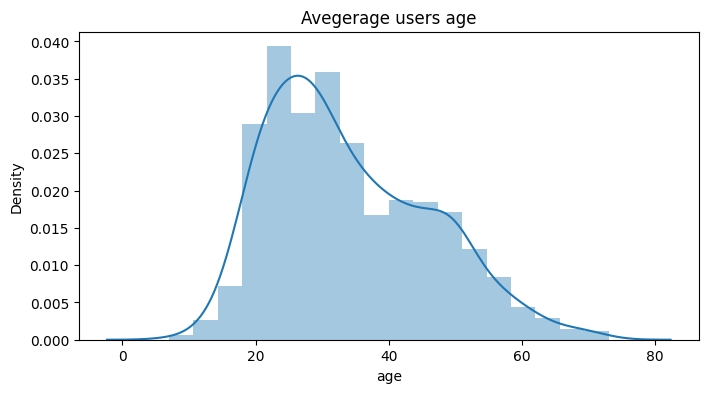

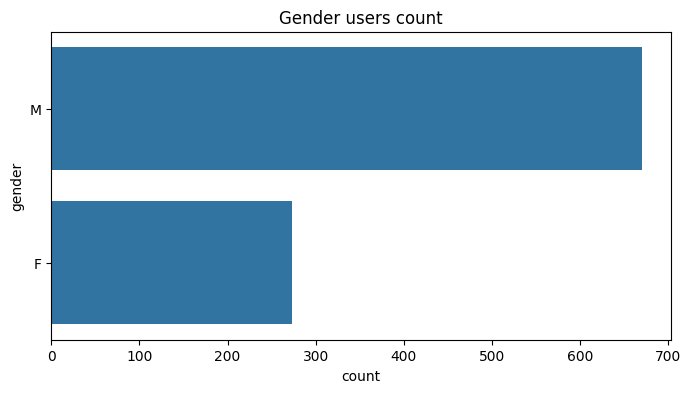

TypeError: Data source must be a DataFrame or Mapping, not <class 'pandas.core.series.Series'>.

In [42]:
#I don't like use another people line, split is nice but I researched another way =)
Movies['release date'] = pd.to_datetime(Movies['release date'])
Movies['release year'] = Movies['release date'].dt.year

plt.rcParams["figure.figsize"] = (8,4)

ageP = sns.distplot(Users['age'])
ageP.set_title("Avegerage users age")
plt.show()

genderP = sns.countplot(Users['gender'])
genderP.set_title("Gender users count")
plt.show()

OccuP = sns.countplot(y = Users.index, data=Users['occupation'],orient='h',order = Users['occupation'].value_counts().index)
OccuP.set_title("Occupation users count")
plt.show()

ratingP = sns.countplot(UsersRating['rating'])
ratingP.set_title("Rating range count")
plt.show()

plt.rcParams["figure.figsize"] = (10,12)
releaseP = sns.countplot(y = Movies.index, data=Movies.sort_values(by='release year')['release year'],orient='v')
releaseP.set_title("Release per year count")
plt.show()
plt.rcdefaults()

### 8. Visualize how popularity of genres has changed over the years - 10 marks

Note that you need to use the number of releases in a year as a parameter of popularity of a genre

Hint 

1: you need to reach to a data frame where the release year is the index and the genre is the column names (one cell shows the number of release in a year in one genre) or vice versa.
Once that is achieved, you can either use univariate plots or can use the heatmap to visualise all the changes over the years 
in one go. 

Hint 2: Use groupby on the relevant column and use sum() on the same to find out the nuumber of releases in a year/genre.  

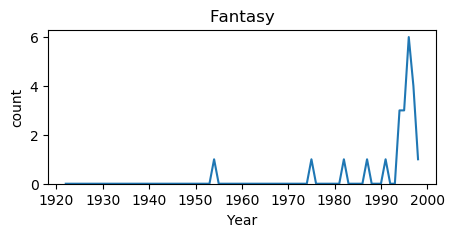

None


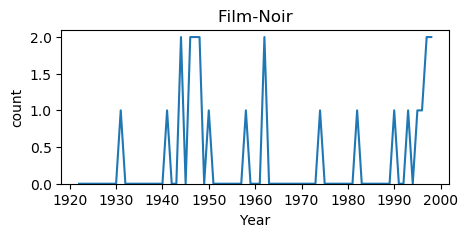

None


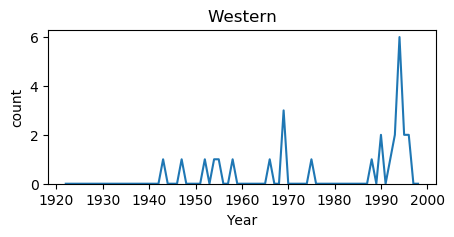

None


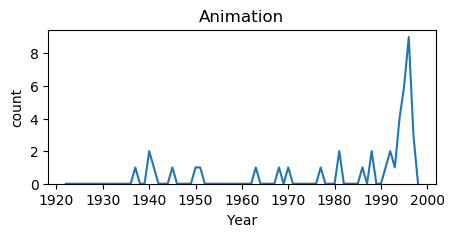

None


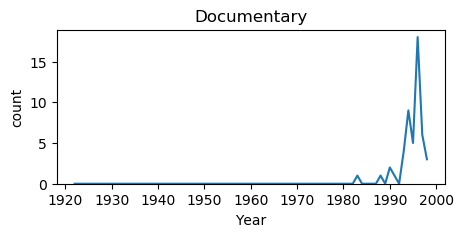

None


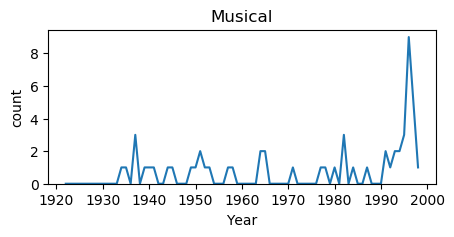

None


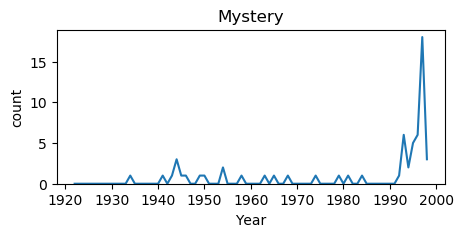

None


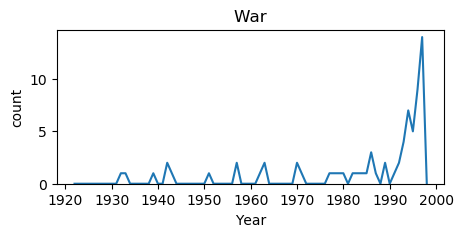

None


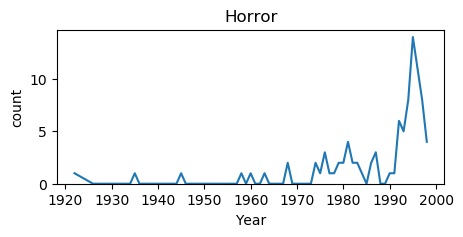

None


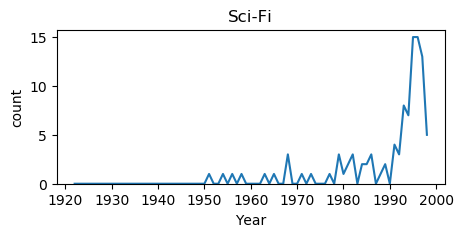

None


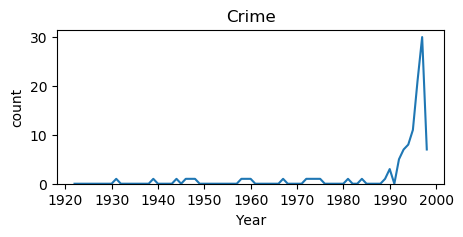

None


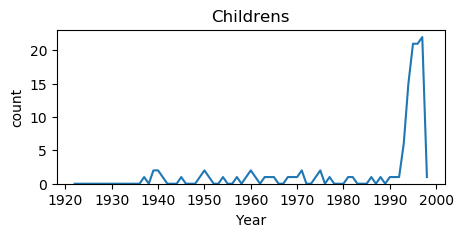

None


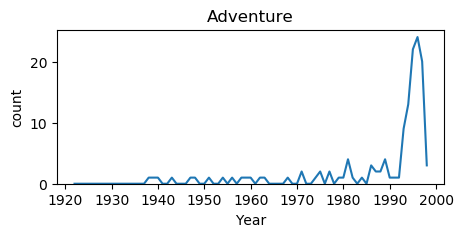

None


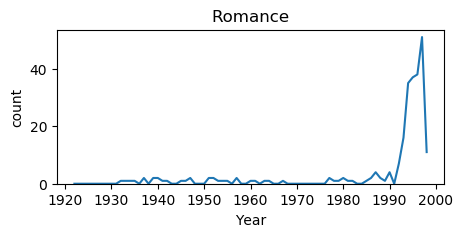

None


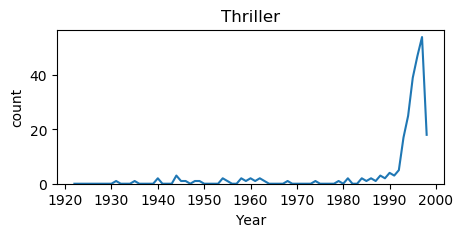

None


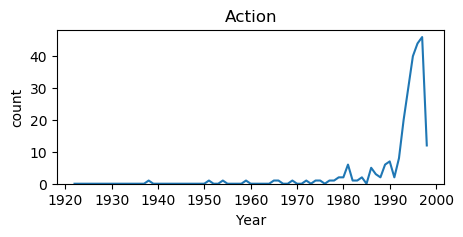

None


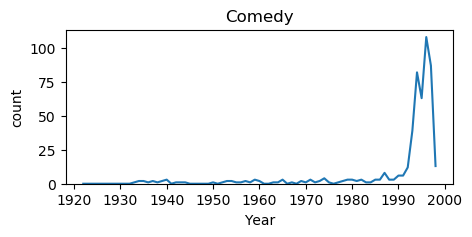

None


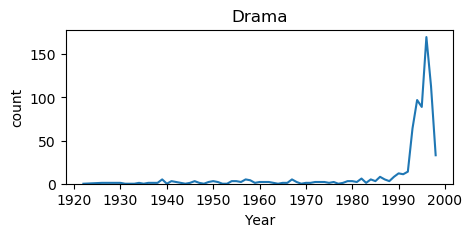

None


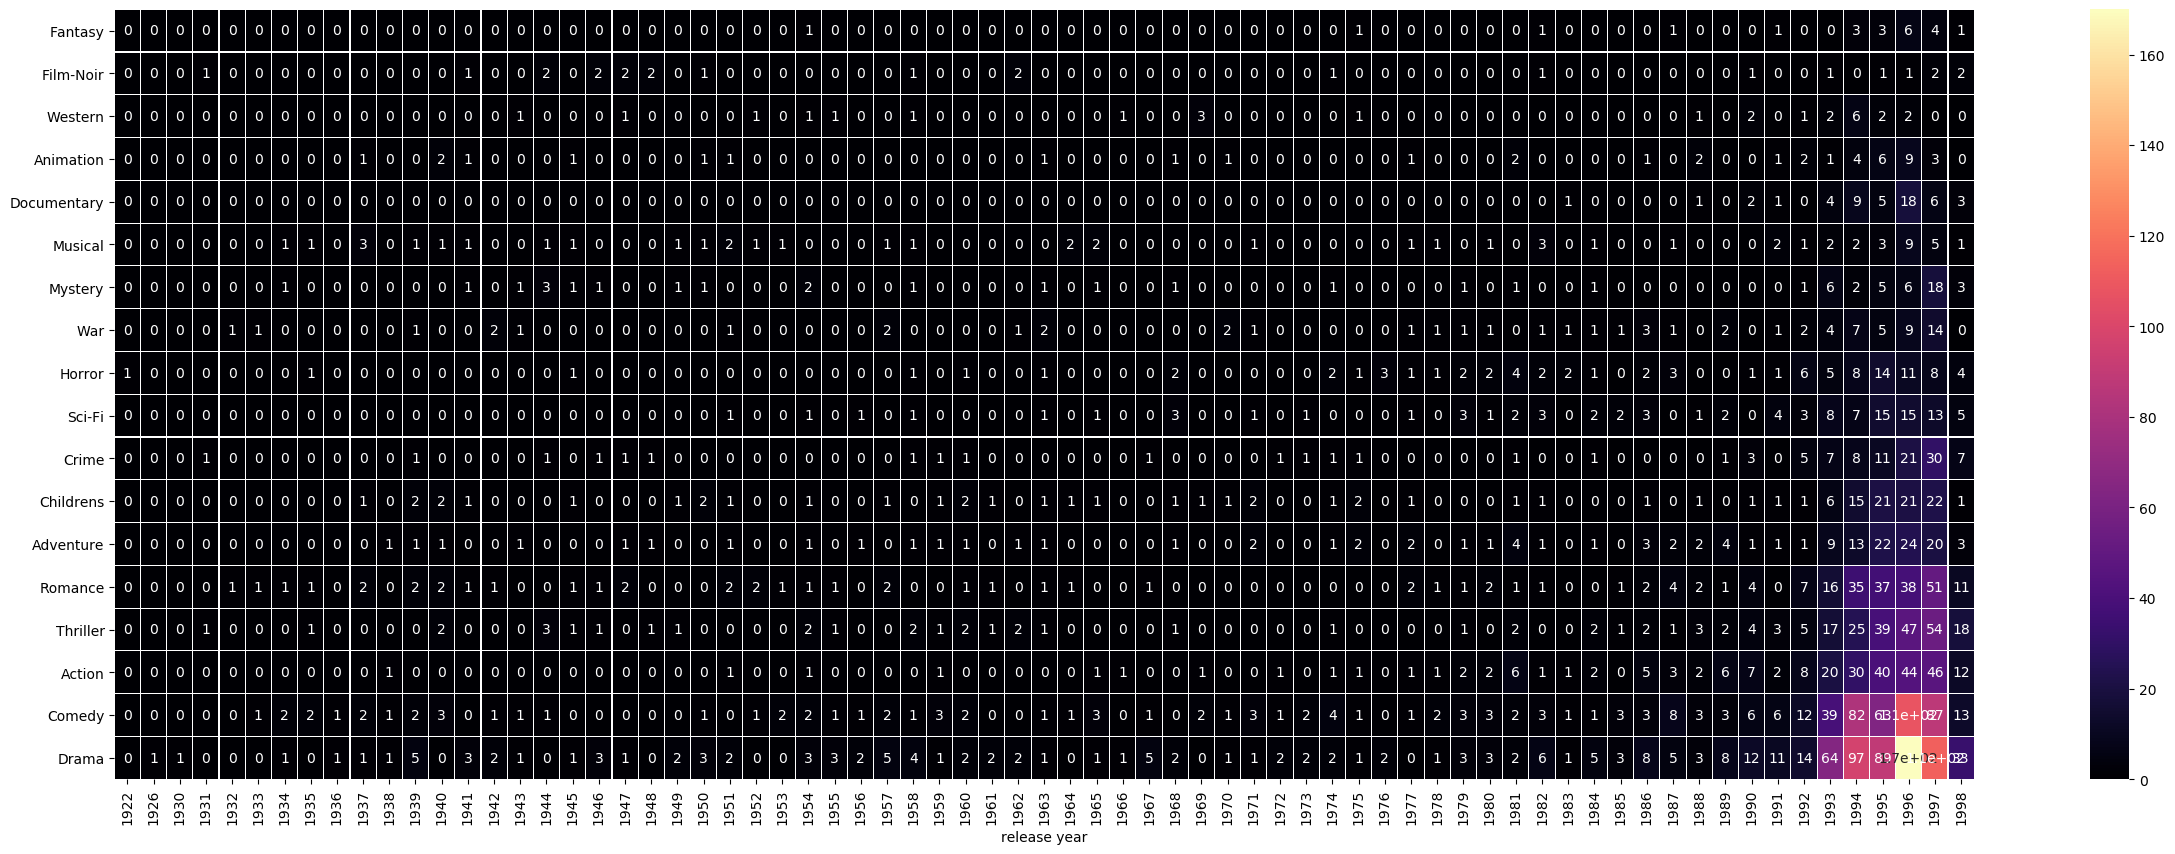

In [ ]:
OneForAllMR = pd.merge(left=Movies, right=UsersRating , on="movie id",  how='left')
OneForAllUS = pd.merge(left=OneForAllMR, right=Users , on="user id",  how='outer')

#Univariate
maxCount = 0;

listPopularity = []
for genre in MoviesGenre.index:
    Popularity = pd.DataFrame(Movies, columns=['release year', genre]).loc[Movies[genre] != 0].sort_values('release year')
    Popularity = Popularity.groupby('release year').count().agg(list).T
    listPopularity.append(Popularity)
    
    maxGenre = Popularity.max().max()
    if maxCount < maxGenre:
        maxCount = maxGenre

PopularityFrame = pd.concat(listPopularity)
PopularityFrame = PopularityFrame.fillna(0)

for genre in MoviesGenre.index:
    Popularity = pd.DataFrame(PopularityFrame.T, columns=[genre])
    plt.rcParams["figure.figsize"] = (5,2)
    plt.plot(Popularity.index, Popularity[genre])
    #plt.ylim(top=maxCount)
    plt.ylim(bottom=0)
    plt.xlabel('Year')
    plt.ylabel('count')
    plt.title(genre)
    print(plt.show())
    
plt.rcdefaults()

#Heat
fig,ax = plt.subplots(figsize=(30,10))
sns.heatmap(PopularityFrame, ax=ax, annot=True, linewidths=0.05,cmap='magma')
plt.show()

### 9. Find the top 25 movies according to average ratings such that each movie has number of ratings more than 100 - 10 marks

Hint : 
1. First find the movies that have more than 100 ratings(use merge, groupby and count). Extract the movie titles in a list.
2. Find the average rating of all the movies and sort them in the descending order. You will have to use the .merge() function to reach to a data set through which you can get the names and the average rating.
3. Use isin(list obtained from 1) to filter out the movies which have more than 100 ratings.

Note: This question will need you to research about groupby and apply your findings. You can find more on groupby on https://realpython.com/pandas-groupby/.

### 10. See gender distribution across different genres check for the validity of the below statements - 10 marks

* Men watch more drama than women
* Women watch more Sci-Fi than men
* Men watch more Romance than women


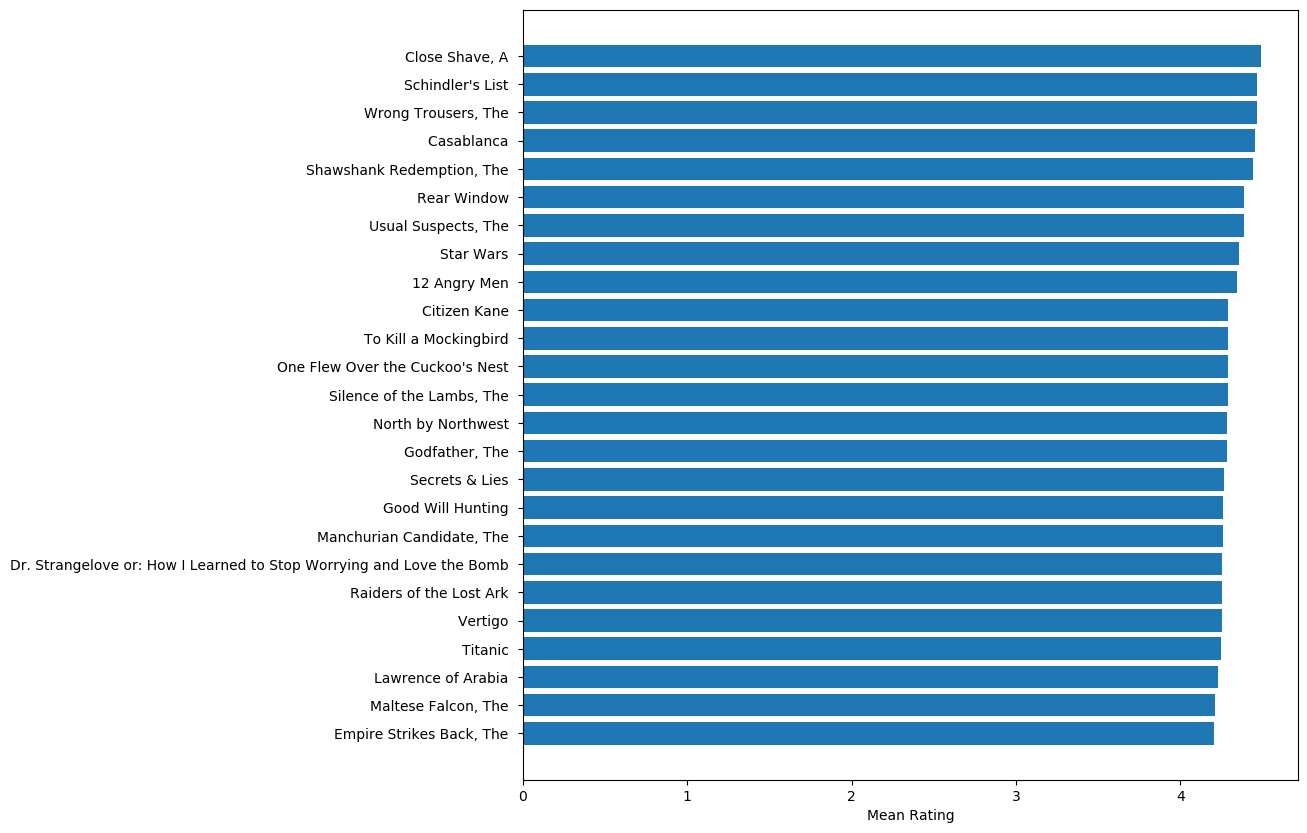

In [ ]:
MoviesRating = pd.DataFrame(OneForAllMR, columns=['movie title', 'rating'])
MoviesRatingC = MoviesRating.groupby('movie title', as_index=False).count().agg(list)
MoviesRatingC = MoviesRatingC.loc[MoviesRatingC['rating']>100]

MoviesRatingG = MoviesRating.groupby('movie title', as_index=False).mean().agg(list)
MoviesRatingG = MoviesRatingG.loc[MoviesRatingC.index].sort_values(by='rating', ascending=False).head(25).sort_values(by='rating', ascending=True)

mox = MoviesRatingG['movie title']
moy = MoviesRatingG['rating']

plt.rcParams["figure.figsize"] = (10,10)

fig, ax = plt.subplots()

ax.barh(mox, moy)
ax.set_xlabel('Mean Rating')

plt.show()

1. There is no need to conduct statistical tests around this. Just compare the percentages and comment on the validity of the above statements.

2. you might want ot use the .sum(), .div() function here.
3. Use number of ratings to validate the numbers. For example, if out of 4000 ratings received by women, 3000 are for drama, we will assume that 75% of the women watch drama.

#### Conclusion:



           rating
count  273.000000
mean    40.322344
std     45.510407
min      1.000000
25%     13.000000
50%     24.000000
75%     52.000000
max    410.000000


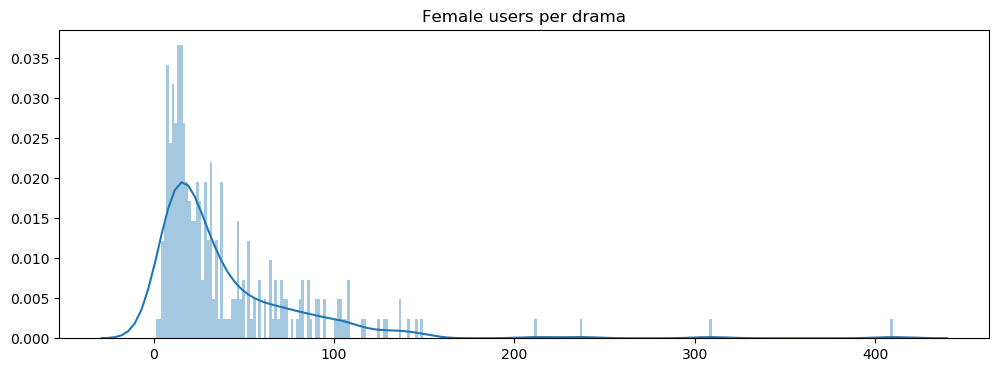

Total of Female Users: 273
Total of Ratings: 11008
Total of Females that also watch Drama: 273

Conclusion: 100.0% watch drama




In [ ]:
#OneForAllUS is an outer merge
FemaleDistribution = pd.DataFrame(OneForAllUS, columns=['user id', 'rating']).loc[(OneForAllUS['Drama'] != 0) & (OneForAllUS['gender'] == 'F')]
FemaleDistribution = FemaleDistribution.groupby('user id').count().agg(list)
FemaleDramaWatchers = FemaleDistribution.loc[FemaleDistribution['rating']>0]

print(FemaleDistribution.describe())

femaleCount = len(Users.loc[Users['gender'] == 'F'])
femaleRAtings = FemaleDramaWatchers['rating'].sum()
femaleDramaCount = len(FemaleDramaWatchers)

plt.rcParams["figure.figsize"] = (12,4)
fm = sns.distplot(FemaleDistribution, bins=femaleCount)
fm.set_title("Female users per drama")
plt.show()

print('Total of Female Users: ' + str(femaleCount))
print('Total of Ratings: ' + str(femaleRAtings))
print('Total of Females that also watch Drama: ' + str(femaleDramaCount))

print('\nConclusion: ' + str(femaleDramaCount / femaleCount * 100) + '% watch drama')
print('\n')